In [1]:
import pandas as pd
import numpy as np
from math import floor
import matplotlib.pyplot as plt
import pylab
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")  
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#on enlève les fausses données
cleandf = df[df['person_emp_length'] < 100]
cleandf = cleandf[cleandf['person_age'] <100]
cleandf = cleandf[cleandf['loan_int_rate'].isnull() == False]
cleandf = cleandf[cleandf['person_emp_length'].isnull() == False]
cleandf = cleandf[cleandf['person_income'] < 493746] #on enlève le 0.1% des revenus max

In [4]:
cleandf.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000
mean,27.692964,65236.540741,4.775531,9647.596473,11.039414,0.216772,0.169744,5.782073
std,6.149342,40711.977125,4.031130,6319.450980,3.230047,0.412053,0.106272,4.023580
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,39306.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,55600.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,480000.000000,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
y = pd.get_dummies(cleandf.person_home_ownership, prefix='person_home_ownership')
y2 = pd.get_dummies(cleandf.loan_intent, prefix='loan_intent')
y3 = pd.get_dummies(cleandf.loan_grade, prefix='loan_grade')
y4 = pd.get_dummies(cleandf.cb_person_default_on_file, prefix='cb_person_default_on_file')
y4 = y4.drop(['cb_person_default_on_file_N'], axis = 1)

In [6]:
frames = [cleandf, y, y2, y3, y4]
finaldf = pd.concat(frames, axis=1, join="inner")

In [7]:
target = finaldf['loan_status']
finaldf = finaldf.drop(['loan_status','person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'], axis = 1)
finaldf.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
count,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,...,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000,28583.000000
mean,27.692964,65236.540741,4.775531,9647.596473,11.039414,0.169744,5.782073,0.411783,0.003219,0.076514,...,0.170136,0.174684,0.328447,0.319456,0.198894,0.113459,0.030403,0.007277,0.002064,0.178008
std,6.149342,40711.977125,4.031130,6319.450980,3.230047,0.106272,4.023580,0.492165,0.056643,0.265823,...,0.375759,0.379703,0.469657,0.466274,0.399175,0.317159,0.171696,0.084996,0.045387,0.382526
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.010000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,39306.000000,2.000000,5000.000000,7.900000,0.090000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,55600.000000,4.000000,8000.000000,10.990000,0.150000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,80000.000000,7.000000,12500.000000,13.480000,0.230000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,480000.000000,41.000000,35000.000000,23.220000,0.830000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
target.describe()

count    28583.000000
mean         0.216772
std          0.412053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Histogramme des revenus des individus')

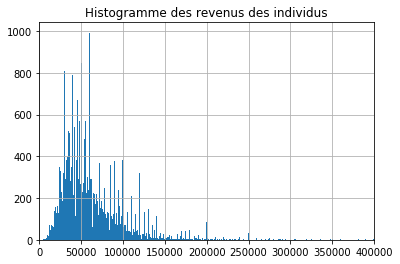

In [9]:
finaldf['person_income'].hist(bins = 500)
plt.xlim(0,400000)
plt.title("Histogramme des revenus des individus")

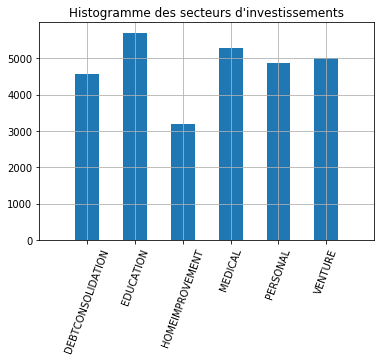

In [10]:
plt.xlim(0,7)
plt.title("Histogramme des secteurs d'investissements")

x = [1,2,3,4,5,6]
y = [np.sum(finaldf['loan_intent_DEBTCONSOLIDATION']) ,np.sum(finaldf['loan_intent_EDUCATION']),np.sum(finaldf['loan_intent_HOMEIMPROVEMENT']),np.sum(finaldf['loan_intent_MEDICAL']),np.sum(finaldf['loan_intent_PERSONAL']),np.sum(finaldf['loan_intent_VENTURE'])]

plt.bar(x,y, 0.5)
plt.grid()
BarName = ['DEBTCONSOLIDATION', 'EDUCATION','HOMEIMPROVEMENT', 'MEDICAL','PERSONAL', 'VENTURE']
pylab.xticks(x, BarName, rotation=70)
plt.show()

In [11]:
#Jeu d'apprentissage et test
X_train, X_test, y_train, y_test = train_test_split(finaldf, target, test_size = 0.2)

#Modèle 1 : Régression linéaire
clf = linear_model.LogisticRegression(solver='liblinear', C = 1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 

cm = pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])

h1 = accuracy_score(y_test, y_pred)
print("Accuracy test set: " , h1)
print("class 0 precision : " , cm[0][0]/(cm[0][0]+cm[0][1]))
print("class 0 rappel : " , cm[0][0]/(cm[0][0]+cm[1][0]))

print("class 1 precision : " , cm[1][1]/(cm[1][0]+cm[1][1]))
print("class 1 rappel : " , cm[1][1]/(cm[0][1]+cm[1][1]))
cm

Accuracy test set:  0.8233339163897149
class 0 precision :  0.8306513409961686
class 0 rappel :  0.9717615419094576
class 1 precision :  0.7464788732394366
class 1 rappel :  0.29561752988047807


classe prédite,0,1
classe réelle,,
0,4336,126
1,884,371


In [12]:
#record: 0.8313800944551338

In [13]:
col = finaldf.columns
col = col.to_numpy().reshape(1,25)

coef_mod1 = clf.coef_
intercept1 = clf.intercept_
col_coef = np.concatenate((col,coef_mod1))

arg =  np.argsort(abs(coef_mod1[0,:]))

In [14]:
#Affichage de l'ordonnée à l'origine et des coefficient du modèle
print("Coefficients du modèle linéaire simple\n")
print("ordonnée à l'origine : {0}\n".format(intercept1[0]))
for i in arg:
    print(col_coef[0][i],": " ,col_coef[1][i])

Coefficients du modèle linéaire simple

ordonnée à l'origine : -0.0018392787767599532

person_home_ownership_OTHER :  3.769554253454406e-05
person_income :  -4.36419305661839e-05
loan_amnt :  0.00010616465021687016
loan_grade_G :  0.0004301364934916851
loan_percent_income :  0.0005124777358960273
loan_grade_F :  0.0008626122344857079
loan_intent_PERSONAL :  -0.0009510786613808113
loan_intent_MEDICAL :  0.0016134261336030506
loan_grade_C :  -0.0018571566549467865
loan_intent_HOMEIMPROVEMENT :  0.0020741217925220965
loan_intent_DEBTCONSOLIDATION :  0.0025126852866155553
cb_person_cred_hist_length :  0.003200155318973209
loan_grade_E :  0.003298335653413288
loan_intent_EDUCATION :  -0.0033005553410184233
loan_intent_VENTURE :  -0.003787877987101648
person_home_ownership_OWN :  -0.004318553865676695
person_home_ownership_MORTGAGE :  -0.005868874116562982
loan_grade_B :  -0.00620670945013308
cb_person_default_on_file_Y :  0.006848509434032691
person_home_ownership_RENT :  0.0083104536629448

In [15]:
#Modèle 1Bis : Régression linéaire avec poids des classes équilibrés
clf_balanced = linear_model.LogisticRegression(solver='liblinear', class_weight = 'balanced', C = 1.0)
clf_balanced.fit(X_train, y_train)
y_pred = clf_balanced.predict(X_test) 

cm = pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])

print("Accuracy test set: " , accuracy_score(y_test, y_pred))
print("class 0 precision : " , cm[0][0]/(cm[0][0]+cm[0][1]))
print("class 0 rappel : " , cm[0][0]/(cm[0][0]+cm[1][0]))

print("class 1 precision : " , cm[1][1]/(cm[1][0]+cm[1][1]))
print("class 1 rappel : " , cm[1][1]/(cm[0][1]+cm[1][1]))
cm

Accuracy test set:  0.7486443939128914
class 0 precision :  0.9245018243053607
class 0 rappel :  0.7382339757956073
class 1 precision :  0.45775301764159704
class 1 rappel :  0.7856573705179283


classe prédite,0,1
classe réelle,,
0,3294,1168
1,269,986


In [16]:
coef_mod2 = clf_balanced.coef_
intercept2 = clf_balanced.intercept_

col_coef_mod2 = np.concatenate((col,coef_mod2))
arg2 =  np.argsort(abs(coef_mod2[0,:]))

In [17]:
print("Coefficients du modèle linéaire équilibré\n")
print('intercept :{0} \n'.format(intercept2[0]))

for i in arg2:
    print(col_coef_mod2[0][i],": " ,col_coef_mod2[1][i])

Coefficients du modèle linéaire équilibré

intercept :-0.112328093075366 

person_income :  -3.0313025014896424e-05
loan_amnt :  9.478233699455558e-05
person_home_ownership_OTHER :  0.0019096973940279987
person_emp_length :  -0.008736122541363883
loan_grade_G :  0.01345005663685188
loan_grade_F :  0.02476906574606257
loan_grade_A :  -0.04011906454267047
loan_intent_PERSONAL :  -0.05324027850203813
loan_percent_income :  0.0647521669084615
loan_intent_MEDICAL :  0.07873037080718034
cb_person_default_on_file_Y :  0.08876241446155299
person_age :  -0.09139168367649445
loan_grade_E :  0.10182843548201763
cb_person_cred_hist_length :  0.11567336625795033
loan_intent_HOMEIMPROVEMENT :  0.13431826070625977
loan_intent_DEBTCONSOLIDATION :  0.15626303801579983
loan_intent_EDUCATION :  -0.17915808758320825
person_home_ownership_MORTGAGE :  -0.1838326249959232
loan_int_rate :  0.23469238800872202
person_home_ownership_OWN :  -0.24893162206135222
loan_intent_VENTURE :  -0.24924139651935645
loan_gr

In [18]:
#Normalisation du jeu de données
normalized_df=(finaldf-finaldf.min())/(finaldf.max()-finaldf.min())
X_trainNorm, X_testNorm, y_train, y_test = train_test_split(normalized_df, target, test_size = 0.2)
X_trainNorm, X_validNorm, y_train, y_valid = train_test_split(X_trainNorm, y_train, test_size = 0.25)

In [19]:
#Modèle 2 : Reseau de neurones
from sklearn.neural_network import MLPClassifier


clfNN = MLPClassifier(solver='adam', alpha=5e-5, hidden_layer_sizes=(25,5), max_iter = 300)
clfNN.fit(X_trainNorm, y_train)
y_pred = clfNN.predict(X_validNorm) 

cm = pd.crosstab(y_valid, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])


print("Accuracy sur données de validation: ", accuracy_score(y_valid, y_pred))
cm

Accuracy sur données de validation:  0.9219870561483295


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


classe prédite,0,1
classe réelle,,
0,4398,91
1,355,873


In [20]:
y_pred = clfNN.predict(X_testNorm) 
cm = pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])

h2 = accuracy_score(y_test, y_pred)
print("Accuracy sur données de test: ", h2)
cm

Accuracy sur données de test:  0.9274094804967641


classe prédite,0,1
classe réelle,,
0,4429,95
1,320,873


In [21]:
#record: 0.92788545486293

In [22]:
#Modèle 3 : Arbres de décision
from sklearn import tree

Mdepth = np.arange(3,50,1)
score = []
for i in Mdepth: 
    clf = tree.DecisionTreeClassifier(max_depth = i )
    clf = clf.fit(X_trainNorm, y_train)
    score.append(clf.score(X_validNorm, y_valid))

print("On prend un arbre de profondeur {0} car le score de validation est maximum et vaut {1}" .format(Mdepth[np.argmax(score)], np.max(score)))

On prend un arbre de profondeur 7 car le score de validation est maximum et vaut 0.9314325695294735


In [23]:
clf = tree.DecisionTreeClassifier(max_depth = Mdepth[np.argmax(score)])
clf = clf.fit(X_trainNorm, y_train)
print("Accuracy test set : ", clf.score(X_testNorm, y_test))

Accuracy test set :  0.9351058247332517


In [24]:
#record: 0.9376636982713462

In [25]:
#Modèle 3bis : Arbres de décision avc cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dec_tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('dec_tree', dec_tree)])

Mdepth = np.arange(3,15,1)
parameters = dict(dec_tree__max_depth=Mdepth)



clfDT = GridSearchCV(pipe, parameters, cv=5)
clfDT.fit(X_trainNorm,y_train)

bestDepth = clfDT.best_estimator_.get_params()['dec_tree__max_depth']
print('Best max_depth:', bestDepth)
y_pred = clfDT.predict(X_testNorm)

h3 = clfDT.score(X_testNorm,y_test)

print("Accuracy sur données test: " , h3)
cm = pd.crosstab(y_test, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])
cm

Best max_depth: 8
Accuracy sur données test:  0.9375546615357705


classe prédite,0,1
classe réelle,,
0,4504,20
1,337,856


In [26]:
clfDT = DecisionTreeClassifier(max_depth = bestDepth)
clfDT.fit(X_trainNorm,y_train)

coef_modDT = clfDT.feature_importances_.reshape(1,25)

col_coef_modDT = np.concatenate((col,coef_modDT))
arg3 =  np.argsort(abs(coef_modDT[0,:]))

In [27]:
print("Importances des features selon le modèle Arbre de décision\n")

for i in arg3:
    print(col_coef_modDT[0][i],": " ,col_coef_modDT[1][i])


Importances des features selon le modèle Arbre de décision

loan_intent_EDUCATION :  0.0
loan_grade_F :  0.0
loan_grade_B :  0.0
loan_grade_A :  0.0
loan_intent_PERSONAL :  0.0
cb_person_cred_hist_length :  0.0
cb_person_default_on_file_Y :  0.0003886653209054583
person_home_ownership_OTHER :  0.0006133794313155341
loan_amnt :  0.0009667465644378567
loan_grade_E :  0.0014806297939255555
loan_intent_VENTURE :  0.0018208101441513636
person_age :  0.0039239772772100895
person_home_ownership_MORTGAGE :  0.0052297971398255
loan_grade_G :  0.008730586052748868
loan_intent_HOMEIMPROVEMENT :  0.01117062037868832
person_home_ownership_OWN :  0.013598865308285385
loan_grade_D :  0.028397938489024055
person_emp_length :  0.028411800060104485
loan_intent_DEBTCONSOLIDATION :  0.037010860929980315
loan_intent_MEDICAL :  0.042258655574827865
loan_grade_C :  0.04753882326395498
person_income :  0.08167005300611242
person_home_ownership_RENT :  0.1767817381145447
loan_int_rate :  0.1981069118512222
loa

In [28]:
#NN version PCA 
linear_training_score = []
linear_valid_score = []

nComp_range = np.arange(20,26,1)

for nC in nComp_range:
    preProc = sklearn.decomposition.PCA(n_components = int(nC))
    preProc.fit(X_trainNorm)
    X_train_Transformed = preProc.transform(X_trainNorm)
    clf = MLPClassifier(solver='adam', alpha=5e-5, hidden_layer_sizes=(25,5), max_iter = 300)
    clf.fit(X_train_Transformed, y_train)
    trainscore = clf.score(X_train_Transformed,y_train)
    validscore = clf.score(preProc.transform(X_validNorm),y_valid)
    print("nombre Composants", nC , "   training score:",trainscore, ". valid score:", validscore)
    linear_training_score.append(trainscore)
    linear_valid_score.   append(validscore)

/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nombre Composants 20    training score: 0.929150387777713 . valid score: 0.9211124715760014


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nombre Composants 21    training score: 0.9253600793049157 . valid score: 0.9214623054049327


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nombre Composants 22    training score: 0.9299667619103155 . valid score: 0.9195382193458107


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


nombre Composants 23    training score: 0.9233774564114525 . valid score: 0.921287388490467
nombre Composants 24    training score: 0.8373666102979765 . valid score: 0.8441490292111247
nombre Composants 25    training score: 0.829669368476296 . valid score: 0.8371523526324995


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [29]:
#NN avec PCA à 24 (meilleur score, donc la PCA ne change pas grand chose)
preProcNNPCA = sklearn.decomposition.PCA(n_components = 24)
preProcNNPCA.fit(X_trainNorm)
X_train_Transformed = preProcNNPCA.transform(X_trainNorm)
clfNNPCA = MLPClassifier(solver='adam', alpha=5e-5, hidden_layer_sizes=(25,5), max_iter = 300)
clfNNPCA.fit(X_train_Transformed, y_train)
y_pred = clfNNPCA.predict(preProcNNPCA.transform(X_validNorm)) 

cm = pd.crosstab(y_valid, y_pred, rownames=['classe réelle'], colnames=['classe prédite'])
h4 = accuracy_score(y_valid, y_pred)
print("Accuracy avec données de validation: ", h4)
cm

Accuracy avec données de validation:  0.9146405457407731


/Users/jaryvallimamode/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


classe prédite,0,1
classe réelle,,
0,4387,102
1,386,842


In [24]:
# record: 0.9331237995460101

In [42]:
#DT avec PCA 
linear_training_score = []
linear_valid_score = []

nComp_range = np.arange(3,26,1)
for nC in nComp_range:
    md = np.arange(7,12)
    for i in md:
        preProc = sklearn.decomposition.PCA(n_components = int(nC)) 
        preProc.fit(X_trainNorm)
        X_train_Transformed = preProc.transform(X_trainNorm)
        clf = tree.DecisionTreeClassifier(max_depth = i )
        clf = clf.fit(X_train_Transformed, y_train)
        trainscore = clf.score(X_train_Transformed,y_train)
        validscore = clf.score(preProc.transform(X_testNorm),y_test)
        print("nombre Composants", nC , "MaxDepth", i ,"   training score:",trainscore, ". valid score:", validscore)
        linear_training_score.append(trainscore)
        linear_valid_score.append(validscore)

nombre Composants 3 MaxDepth 7    training score: 0.8445973526153129 . valid score: 0.8326045128563933
nombre Composants 3 MaxDepth 8    training score: 0.8529943436935098 . valid score: 0.833654014343187
nombre Composants 3 MaxDepth 9    training score: 0.8610997725814916 . valid score: 0.8327794297708588
nombre Composants 3 MaxDepth 10    training score: 0.871945886057496 . valid score: 0.8284065069092181
nombre Composants 3 MaxDepth 11    training score: 0.8830252492856726 . valid score: 0.8271820885079587
nombre Composants 4 MaxDepth 7    training score: 0.8555600909674034 . valid score: 0.844498863040056
nombre Composants 4 MaxDepth 8    training score: 0.8627908332847396 . valid score: 0.8439741122966591
nombre Composants 4 MaxDepth 9    training score: 0.8712461368009796 . valid score: 0.8455483645268498
nombre Composants 4 MaxDepth 10    training score: 0.8805178144498221 . valid score: 0.8455483645268498
nombre Composants 4 MaxDepth 11    training score: 0.8922386144964721 . v

nombre Composants 19 MaxDepth 7    training score: 0.9146889031430404 . valid score: 0.9046702816162323
nombre Composants 19 MaxDepth 8    training score: 0.9223861449647209 . valid score: 0.9011719433269197
nombre Composants 19 MaxDepth 9    training score: 0.9301416992244446 . valid score: 0.901521777155851
nombre Composants 19 MaxDepth 10    training score: 0.9367893171613505 . valid score: 0.8985481896099353
nombre Composants 19 MaxDepth 11    training score: 0.942562248527611 . valid score: 0.8953996851495539
nombre Composants 20 MaxDepth 7    training score: 0.9147472155810834 . valid score: 0.9055448661885604
nombre Composants 20 MaxDepth 8    training score: 0.92256108227885 . valid score: 0.9022214448137135
nombre Composants 20 MaxDepth 9    training score: 0.9300833867864016 . valid score: 0.9025712786426447
nombre Composants 20 MaxDepth 10    training score: 0.9369642544754796 . valid score: 0.8988980234388665
nombre Composants 20 MaxDepth 11    training score: 0.94244562365

In [ ]:
#ne marche pas on a 0.9041382922996333 au mieux

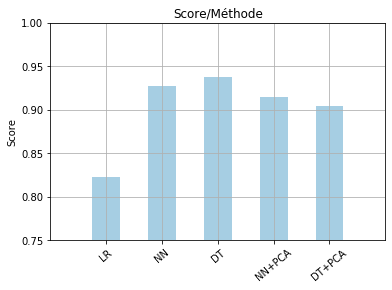

In [30]:
fig = plt.figure()


x = [1,2,3,4,5]
height = [h1,h2,h3,h4,0.9041382922996333]
width = 0.5
BarName = ['LR','NN','DT','NN+PCA','DT+PCA']

plt.bar(x, height, width, color=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1.0) )

plt.xlim(0,6)
plt.ylim(0.75,1)
plt.grid()

plt.ylabel('Score')
plt.title('Score/Méthode')

pylab.xticks(x, BarName, rotation=40)
plt.show()